In [1]:
##import vtk as vtk
import numpy as np
# from vtk.util.numpy_support import vtk_to_numpy
import matplotlib.pyplot as plt
import glob
import os
import time
import h5py
from numpy import linalg as LA
import matplotlib.pyplot as plt
import h5py
from scipy.signal import savgol_filter
from scipy.integrate import quad
from scipy.integrate import simps
from IPython.display import display, Math, Markdown
from matplotlib.ticker import FormatStrFormatter
from random import randint
import pandas as pd

plt.rc('text', usetex=True)


plt.rcParams['font.family'].append(u'monospace')

font = {
'family' : 'monospace',
'color'  : 'black',
'weight' : 'normal',
'size'   : 45,
}
fontlabel = {
    'family' : 'monospace',
    'weight' : 'normal',
    'size'   : 45,
}

params = {
'backend': 'wxAgg',
'lines.markersize': 10,
'lines.linewidth' : 3,
'axes.linewidth'  : 1,
'xtick.major.size': 10,
'xtick.minor.size': 10,
'ytick.major.size': 10 ,
'ytick.minor.size': 10,
'xtick.labelsize' : 30,
'ytick.labelsize' : 30,
'font.weight'     : 'heavy',
'text.usetex'     : True, 
'figure.figsize'  : [9,7],
'legend.fontsize' : 15,
'legend.frameon'  : True,
}


from matplotlib import rcParams

plt.rcParams['text.latex.preamble']=r"\usepackage{bm} \usepackage{amsfonts} \usepackage{scalerel} \usepackage{mathrsfs}"

                                                  
plt.rcParams.update(params)

np.seterr(divide='ignore', invalid='ignore')

colors = ['black','#E69F00','#56B4E9', 'magenta','#9CAAAA', '#009E73', '#0072B2', '#D55E00', '#CC79A7', '#F0E442','#E13925','#BCDA87', 'black']

import matplotlib
mycmap = matplotlib.cm.get_cmap('plasma')
colors[0] = 'black'
colors[1] = mycmap(0.15)
colors[2] = mycmap(0.75)
colors[3] = '#417DC1'
colors[4] = '#0000FF'
colors[5] = '#964B00'
colors[6] = '#7FFF00'
colors[7] = '#B8860B'

from collections import OrderedDict

linestyles = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

myls = ['-',
        '--',
        linestyles['densely dashdotted'],
        linestyles['densely dashdotdotted'],
        linestyles['densely dotted'],
        linestyles['loosely dashdotdotted'],
        linestyles['loosely dashed'],
        linestyles['densely dotted']]

import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
%matplotlib inline


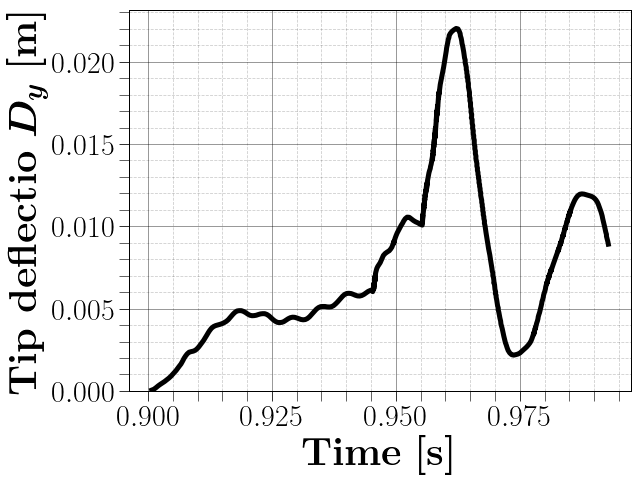

In [43]:
plt.figure(figsize=[9,7])
data1 = np.genfromtxt("data/f51.dat",delimiter=',')
data2 = np.genfromtxt("data/f52.dat",delimiter=',')

# print(data)
plt.plot(data1[:,0],data1[:,1],lw=5,c=colors[0])

# plt.xlim(0.0,14)
plt.ylim(bottom=0)
plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Time} \textbf{[s]}",fontsize=40)
plt.ylabel(r"\textbf{Tip deflectio} $\boldsymbol{D_y}$ \textbf{[m]}",fontsize=40)
# plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("deflection689MPa090.png", bbox_inches='tight', dpi=100)

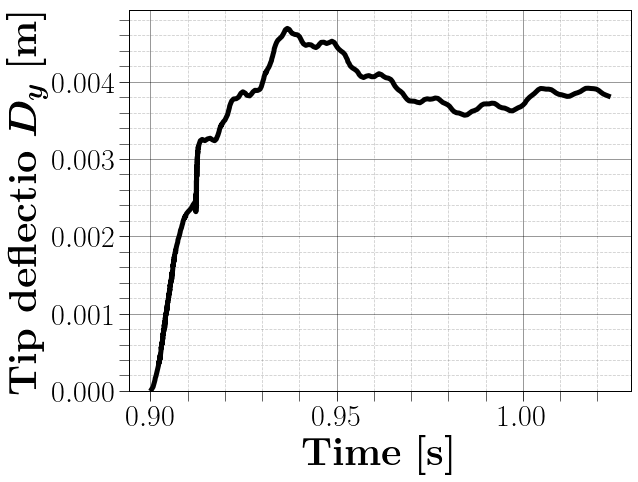

In [42]:
plt.figure(figsize=[9,7])
data1 = np.genfromtxt("data/f51.dat",delimiter=',')
data2 = np.genfromtxt("data/f52.dat",delimiter=',')

# print(data)
plt.plot(data2[:,0],data2[:,1],lw=5,c=colors[0])

# plt.xlim(0.0,14)
plt.ylim(bottom=0)
plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Time} \textbf{[s]}",fontsize=40)
plt.ylabel(r"\textbf{Tip deflectio} $\boldsymbol{D_y}$ \textbf{[m]}",fontsize=40)
# plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("deflection25GPa10.png", bbox_inches='tight', dpi=100)

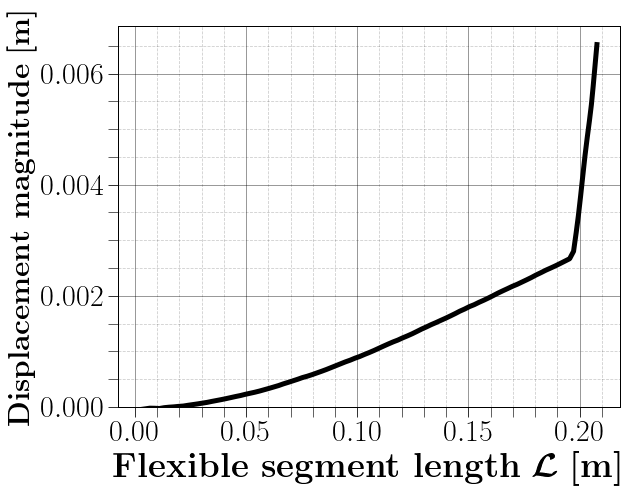

In [53]:
plt.figure(figsize=[9,7])
data1 = np.genfromtxt("data/f61.dat",delimiter=',')

# print(data)
plt.plot(data1[:,0],data1[:,1],lw=5,c=colors[0])

# plt.xlim(0.0,14)
plt.ylim(bottom=0)
plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Flexible segment length} $\boldsymbol{\mathcal{L}}$ \textbf{[m]}",fontsize=35)
plt.ylabel(r"\textbf{Displacement magnitude} \textbf{[m]}",fontsize=30)
# plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("dispmagnitude689MPa.png", bbox_inches='tight', dpi=100)

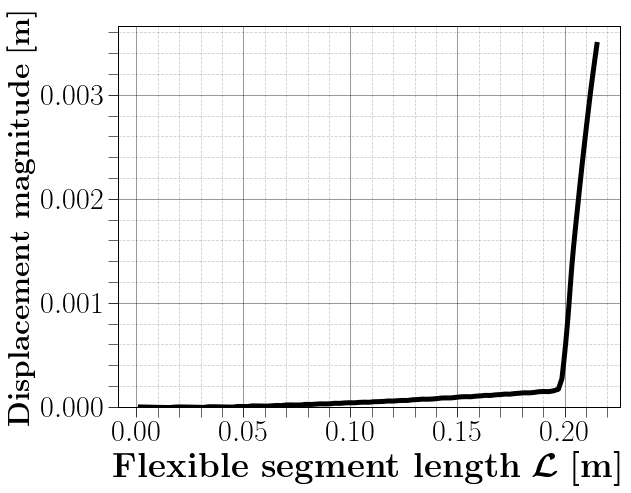

In [52]:
plt.figure(figsize=[9,7])
data1 = np.genfromtxt("data/f62.dat",delimiter=',')

# print(data)
plt.plot(data1[:,0],data1[:,1],lw=5,c=colors[0])

# plt.xlim(0.0,14)
plt.ylim(bottom=0)
plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Flexible segment length} $\boldsymbol{\mathcal{L}}$ \textbf{[m]}",fontsize=35)
plt.ylabel(r"\textbf{Displacement magnitude} \textbf{[m]}",fontsize=30)
# plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("dispmagnitude25GPa.png", bbox_inches='tight', dpi=100)

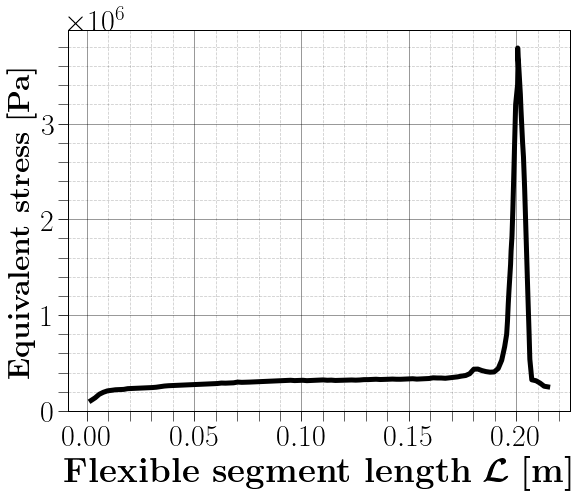

In [54]:
plt.figure(figsize=[9,7])
data1 = np.genfromtxt("data/f91.dat",delimiter=',')

# print(data)
plt.plot(data1[:,0],data1[:,1],lw=5,c=colors[0])

# plt.xlim(0.0,14)
plt.ylim(bottom=0)
plt.grid(visible=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(visible=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Flexible segment length} $\boldsymbol{\mathcal{L}}$ \textbf{[m]}",fontsize=35)
plt.ylabel(r"\textbf{Equivalent stress} \textbf{[Pa]}",fontsize=30)
# plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("equivalentstress.png", bbox_inches='tight', dpi=100)

/tmp/ipykernel_163530/634684601.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
/tmp/ipykernel_163530/634684601.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)


<Figure size 648x504 with 0 Axes>

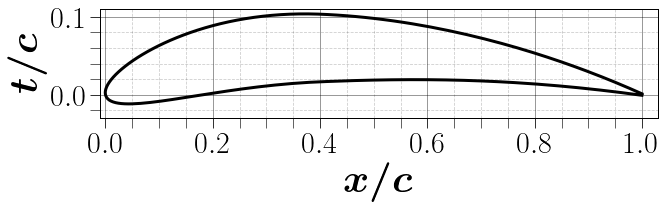

In [13]:
plt.figure(figsize=(9,7))


data = np.genfromtxt("data/naca.dat",skip_header=1)
plt.figure(figsize=[10,2])
plt.plot(data[:,0],data[:,1],lw=3,c=colors[0])
plt.xlim(-0.01,1.03)
plt.ylim(-0.03,0.11)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"$\boldsymbol{x/c}$",fontsize=40)
plt.ylabel(r"$\boldsymbol{t/c}$",fontsize=40)
# plt.fill(data[:,0],data[:,1],c='gray',alpha=0.3)
plt.savefig("figs/naca6409_airfoil.png", bbox_inches='tight', dpi=100)

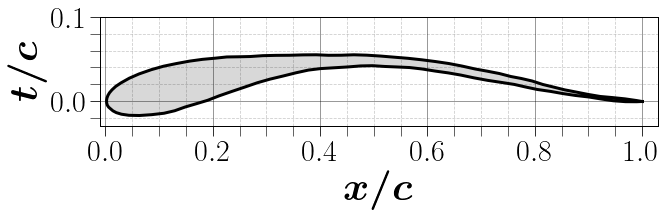

In [41]:
data = np.genfromtxt("data/owl-like.dat",skip_header=1)
plt.figure(figsize=[10,2])
plt.plot(data[:,0],data[:,1],lw=3,c=colors[0])
plt.xlim(-0.01,1.03)
plt.ylim(-0.03,0.1)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"$\boldsymbol{x/c}$",fontsize=40)
plt.ylabel(r"$\boldsymbol{t/c}$",fontsize=40)
plt.fill(data[:,0],data[:,1],c='gray',alpha=0.3)
plt.savefig("figs/owl_airfoil.png", bbox_inches='tight', dpi=100)

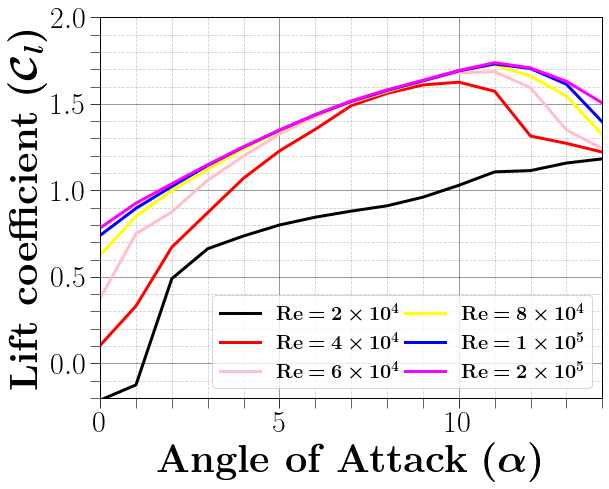

In [3]:
data = np.genfromtxt("data/Figure2/AS6095-cl.dat",skip_header=1)

plt.plot(data[:,0],data[:,1],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^4}$',c=colors[0])
plt.plot(data[:,0],data[:,2],lw=3,label=r'$\boldsymbol{\mathrm{Re}=4\times10^4}$',c='red')
plt.plot(data[:,0],data[:,3],lw=3,label=r'$\boldsymbol{\mathrm{Re}=6\times10^4}$',c='pink')
plt.plot(data[:,0],data[:,4],lw=3,label=r'$\boldsymbol{\mathrm{Re}=8\times10^4}$',c='yellow')
plt.plot(data[:,0],data[:,5],lw=3,label=r'$\boldsymbol{\mathrm{Re}=1\times10^5}$',c='blue')
plt.plot(data[:,0],data[:,6],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^5}$',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'$\mathrm{Re}=4\times10^5$',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

plt.xlim(0.0,14)
plt.ylim(-0.2,2)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_AS6095.png", bbox_inches='tight', dpi=100)

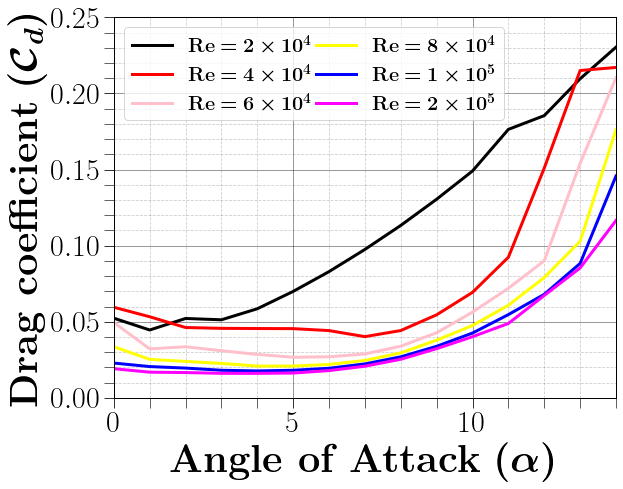

In [4]:
data = np.genfromtxt("data/Figure2/AS6095-cd.dat",skip_header=1)

plt.plot(data[:,0],data[:,1],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^4}$',c=colors[0])
plt.plot(data[:,0],data[:,2],lw=3,label=r'$\boldsymbol{\mathrm{Re}=4\times10^4}$',c='red')
plt.plot(data[:,0],data[:,3],lw=3,label=r'$\boldsymbol{\mathrm{Re}=6\times10^4}$',c='pink')
plt.plot(data[:,0],data[:,4],lw=3,label=r'$\boldsymbol{\mathrm{Re}=8\times10^4}$',c='yellow')
plt.plot(data[:,0],data[:,5],lw=3,label=r'$\boldsymbol{\mathrm{Re}=1\times10^5}$',c='blue')
plt.plot(data[:,0],data[:,6],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^5}$',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'$\mathrm{Re}=4\times10^5$',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

plt.xlim(0.0,14)
plt.ylim(0.,0.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Drag coefficient} $\boldsymbol{(\mathcal{C}_d)}$",fontsize=40)
plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cd_AS6095.png", bbox_inches='tight', dpi=100)

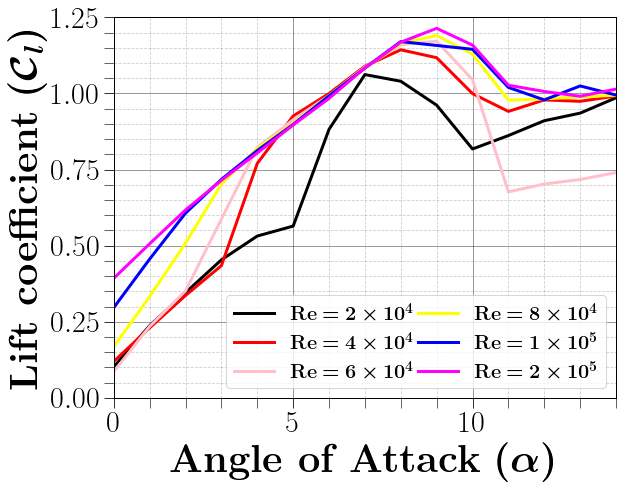

In [5]:
data = np.genfromtxt("data/Figure2/owl-cl.dat",skip_header=1)

plt.plot(data[:,0],data[:,1],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^4}$',c=colors[0])
plt.plot(data[:,0],data[:,2],lw=3,label=r'$\boldsymbol{\mathrm{Re}=4\times10^4}$',c='red')
plt.plot(data[:,0],data[:,3],lw=3,label=r'$\boldsymbol{\mathrm{Re}=6\times10^4}$',c='pink')
plt.plot(data[:,0],data[:,4],lw=3,label=r'$\boldsymbol{\mathrm{Re}=8\times10^4}$',c='yellow')
plt.plot(data[:,0],data[:,5],lw=3,label=r'$\boldsymbol{\mathrm{Re}=1\times10^5}$',c='blue')
plt.plot(data[:,0],data[:,6],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^5}$',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'$\mathrm{Re}=4\times10^5$',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

plt.xlim(0.0,14)
plt.ylim(0.,1.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_owl.png", bbox_inches='tight', dpi=100)

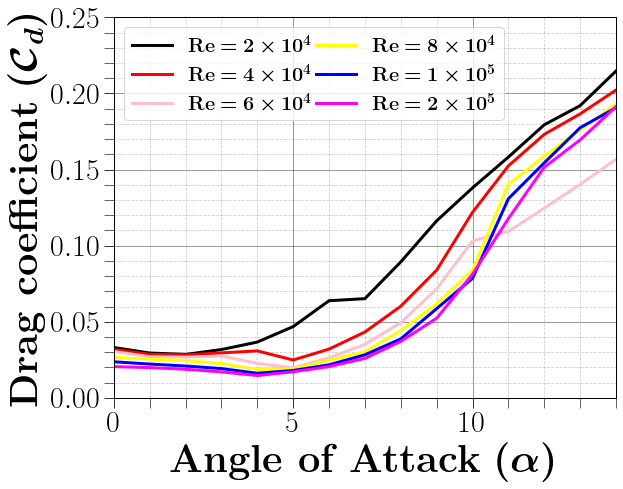

In [7]:
data = np.genfromtxt("data/Figure2/owl-cd.dat",skip_header=1)

plt.plot(data[:,0],data[:,1],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^4}$',c=colors[0])
plt.plot(data[:,0],data[:,2],lw=3,label=r'$\boldsymbol{\mathrm{Re}=4\times10^4}$',c='red')
plt.plot(data[:,0],data[:,3],lw=3,label=r'$\boldsymbol{\mathrm{Re}=6\times10^4}$',c='pink')
plt.plot(data[:,0],data[:,4],lw=3,label=r'$\boldsymbol{\mathrm{Re}=8\times10^4}$',c='yellow')
plt.plot(data[:,0],data[:,5],lw=3,label=r'$\boldsymbol{\mathrm{Re}=1\times10^5}$',c='blue')
plt.plot(data[:,0],data[:,6],lw=3,label=r'$\boldsymbol{\mathrm{Re}=2\times10^5}$',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'$\mathrm{Re}=4\times10^5$',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

plt.xlim(0.0,14)
plt.ylim(0.,0.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Drag coefficient} $\boldsymbol{(\mathcal{C}_d)}$",fontsize=40)
plt.legend(ncol=2,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cd_owl.png", bbox_inches='tight', dpi=100)

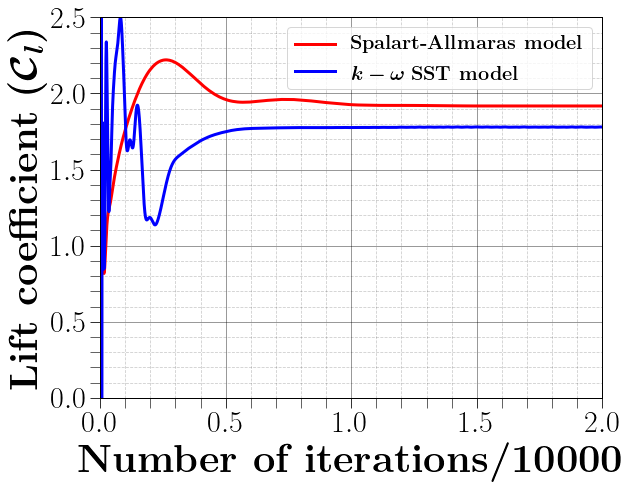

In [23]:
data1 = np.genfromtxt("data/Fig7_forceCoeffs_Spalart.dat",skip_header=30)
data2 = np.genfromtxt("data/Fig7_forceCoeffs_kOmegaSST_100000.dat",skip_header=30)

plt.plot(data1[:,0]/10000,data1[:,3],lw=3,label=r'\textbf{Spalart-Allmaras model}',c='red')
plt.plot(data2[:,0]/10000,data2[:,3],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{SST model}',c='blue')

plt.xlim(0.0,2)
plt.ylim(0.,2.5)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Number of iterations/10000}",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":20},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/conv-cl-sa-komega.png", bbox_inches='tight', dpi=100)

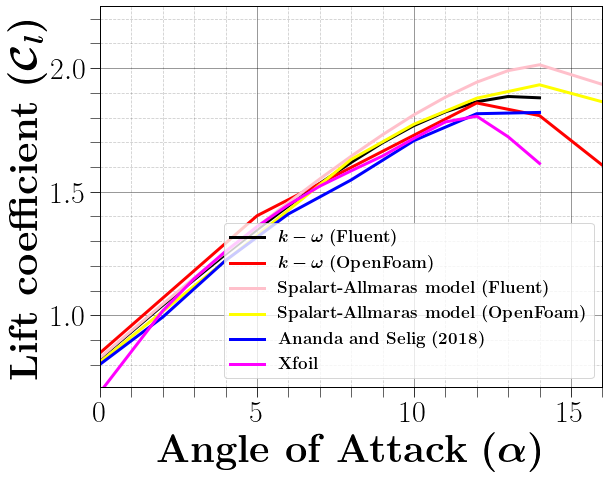

In [22]:
data1 = np.genfromtxt("data/Figure8/fluentKomega.txt")
data2 = np.genfromtxt("data/Figure8/openfoamKomega.txt")
data3 = np.genfromtxt("data/Figure8/fluentsa.txt")
data4 = np.genfromtxt("data/Figure8/openfoamsa.txt")
data5 = np.genfromtxt("data/Figure8/comparison.txt")
data6 = np.genfromtxt("data/Figure8/XFoil.txt")

plt.plot(data1[:,0],data1[:,1],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{(Fluent)}',c=colors[0])
plt.plot(data2[:,0],data2[:,1],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{(OpenFoam)}',c='red')
plt.plot(data3[:,0],data3[:,1],lw=3,label=r'\textbf{Spalart-Allmaras model (Fluent)}',c='pink')
plt.plot(data4[:,0],data4[:,1],lw=3,label=r'\textbf{Spalart-Allmaras model (OpenFoam)}',c='yellow')
plt.plot(data5[:,0],data5[:,1],lw=3,label=r'\textbf{Ananda and Selig (2018)}',c='blue')
plt.plot(data6[:,0],data6[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'\textbf{}',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

plt.xlim(0.0,16)
plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":17},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_allcomp.png", bbox_inches='tight', dpi=100)

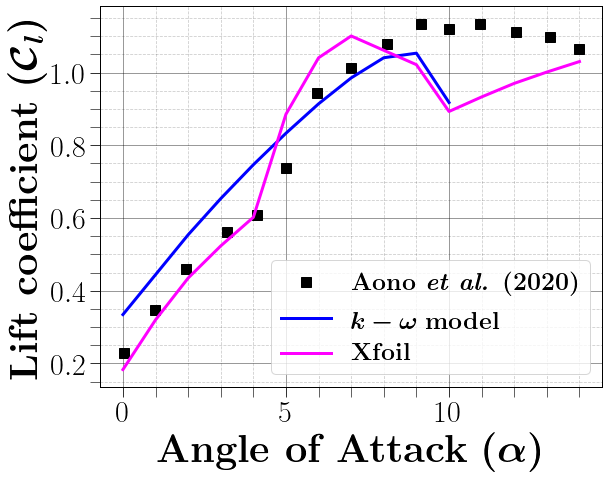

In [48]:
data1 = np.genfromtxt("data/Figure14/exp.txt")
data2 = np.genfromtxt("data/Figure14/KOmegaSST.txt")
data3 = np.genfromtxt("data/Figure14/XFoil.txt")


plt.plot(data1[:,0],data1[:,1],marker='s',color=colors[0],markerfacecolor='black',
            linestyle = 'None',label=r'\textbf{Aono \textit{et al.} (2020)}')
plt.plot(data2[:,0],data2[:,1],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{model}',c='blue')
plt.plot(data3[:,0],data3[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data4[:,0],data4[:,1],lw=3,label=r'\textbf{Spalart-Allmaras model (OpenFoam)}',c='yellow')
# plt.plot(data5[:,0],data5[:,1],lw=3,label=r'\textbf{Ananda and Selig (2018)}',c='blue')
#plt.plot(data6[:,0],data6[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'\textbf{}',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Angle of Attack} $\boldsymbol{(\alpha)}$",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_angleOX.png", bbox_inches='tight', dpi=100)

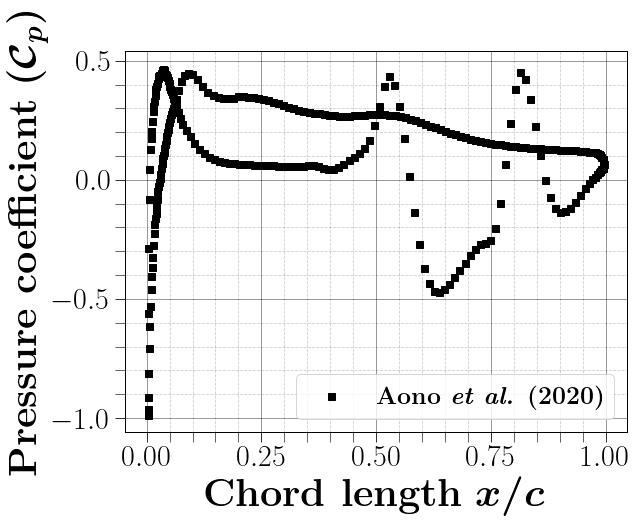

In [49]:
data1 = np.genfromtxt("data/Figure16/cp.txt")



plt.plot(data1[:,0],data1[:,1],marker='s',color=colors[0],markerfacecolor='black',ms=7,
            linestyle = 'None',label=r'\textbf{Aono \textit{et al.} (2020)}')
# plt.plot(data2[:,0],data2[:,1],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{model}',c='blue')
# plt.plot(data3[:,0],data3[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data4[:,0],data4[:,1],lw=3,label=r'\textbf{Spalart-Allmaras model (OpenFoam)}',c='yellow')
# plt.plot(data5[:,0],data5[:,1],lw=3,label=r'\textbf{Ananda and Selig (2018)}',c='blue')
#plt.plot(data6[:,0],data6[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'\textbf{}',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Chord length} $\boldsymbol{x/c}$",fontsize=40)
plt.ylabel(r"\textbf{Pressure coefficient} $\boldsymbol{(\mathcal{C}_p)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cprpessure.png", bbox_inches='tight', dpi=100)

No handles with labels found to put in legend.


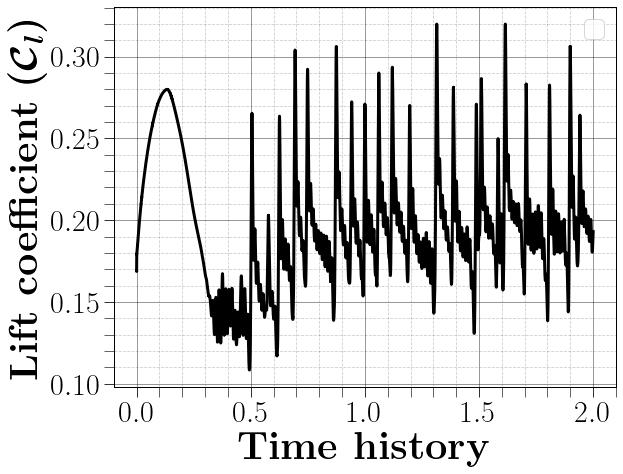

In [51]:
data1 = np.genfromtxt("data/Figure17/cl.txt")



plt.plot(data1[:,0],data1[:,1],lw=3,label=r'',c='black')

# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Time history}",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_ans.png", bbox_inches='tight', dpi=100)

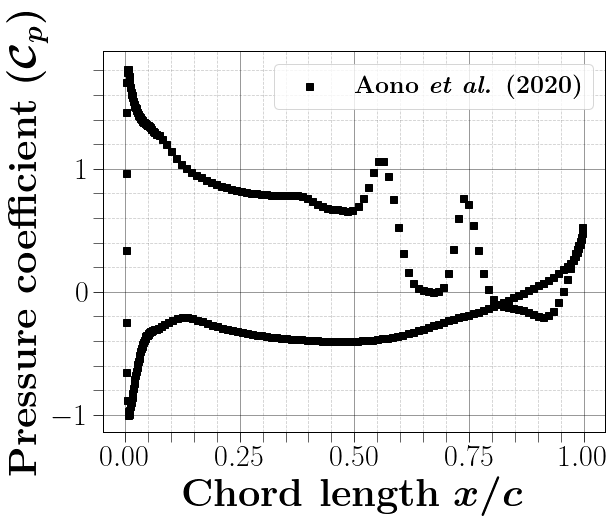

In [55]:
data1 = np.genfromtxt("data/Figure18/cp.txt")



plt.plot(data1[:,0],data1[:,1],marker='s',color=colors[0],markerfacecolor='black',ms=7,
            linestyle = 'None',label=r'\textbf{Aono \textit{et al.} (2020)}')
# plt.plot(data2[:,0],data2[:,1],lw=3,label=r'$\boldsymbol{k-\omega}$ \textbf{model}',c='blue')
# plt.plot(data3[:,0],data3[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data4[:,0],data4[:,1],lw=3,label=r'\textbf{Spalart-Allmaras model (OpenFoam)}',c='yellow')
# plt.plot(data5[:,0],data5[:,1],lw=3,label=r'\textbf{Ananda and Selig (2018)}',c='blue')
#plt.plot(data6[:,0],data6[:,1],lw=3,label=r'\textbf{Xfoil}',c='magenta')
# plt.plot(data[:,0],data[:,7],lw=3,label=r'\textbf{}',c='green')
# plt.plot(data[:,0],data[:,8],lw=3,label=r'$\mathrm{Re}=6\times10^5$',c='gray')

# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Chord length} $\boldsymbol{x/c}$",fontsize=40)
plt.ylabel(r"\textbf{Pressure coefficient} $\boldsymbol{(\mathcal{C}_p)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cprpessureaoa6.png", bbox_inches='tight', dpi=100)

No handles with labels found to put in legend.


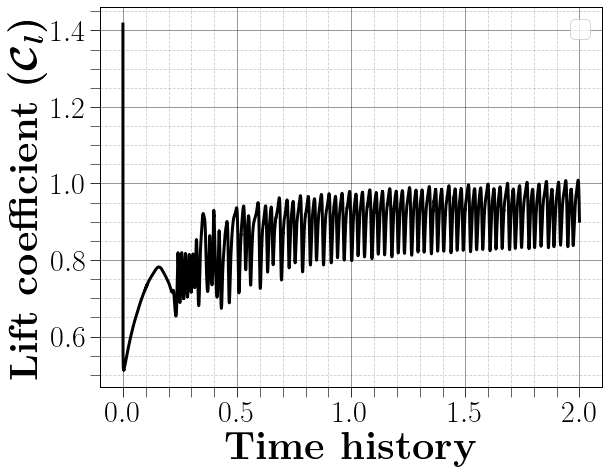

In [56]:
data1 = np.genfromtxt("data/Figure19/cl.txt")



plt.plot(data1[:,0],data1[:,1],lw=3,label=r'',c='black')

# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Time history}",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/cl_ans6.png", bbox_inches='tight', dpi=100)

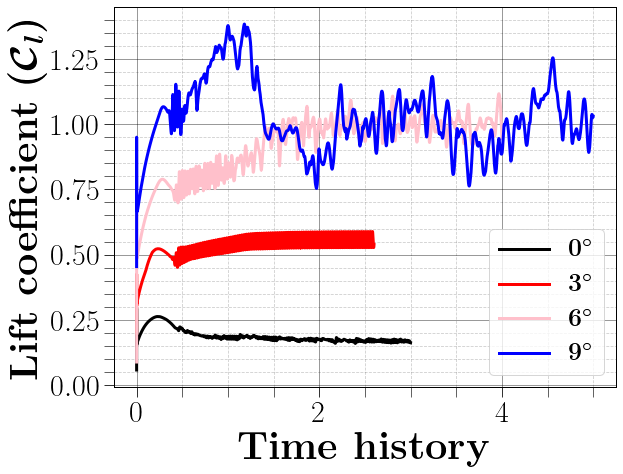

In [60]:
data1 = np.genfromtxt("data/Figure20/Cl-3DLES-angle0.txt")
data2 = np.genfromtxt("data/Figure20/Cl-3DLES-angle3.txt")
data3 = np.genfromtxt("data/Figure20/Cl-3DLES-angle6.txt")
data4 = np.genfromtxt("data/Figure20/Cl-3DLES-angle9.txt")


plt.plot(data1[:,0],data1[:,1],lw=3,label=r'$\boldsymbol{0^{\circ}}$',c=colors[0])
plt.plot(data2[:,0],data2[:,1],lw=3,label=r'$\boldsymbol{3^{\circ}}$',c='red')
plt.plot(data3[:,0],data3[:,1],lw=3,label=r'$\boldsymbol{6^{\circ}}$',c='pink')
plt.plot(data4[:,0],data4[:,1],lw=3,label=r'$\boldsymbol{9^{\circ}}$',c='blue')


# plt.xlim(0.0,16)
# plt.ylim(0.71,2.25)
plt.grid(b=True, which='major', color='k', linestyle='-',alpha=0.5)
plt.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.xlabel(r"\textbf{Time history}",fontsize=40)
plt.ylabel(r"\textbf{Lift coefficient} $\boldsymbol{(\mathcal{C}_l)}$",fontsize=40)
plt.legend(ncol=1,prop={"size":25},handlelength=2.0,handleheight=0.2,columnspacing=0.25)
plt.savefig("figs/allcl.png", bbox_inches='tight', dpi=100)